In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yolo-h5-file/yolo.h5
/kaggle/input/chess-piece-dectection/annotations/chess43.xml
/kaggle/input/chess-piece-dectection/annotations/chess33.xml
/kaggle/input/chess-piece-dectection/annotations/chess16.xml
/kaggle/input/chess-piece-dectection/annotations/chess65.xml
/kaggle/input/chess-piece-dectection/annotations/chess40.xml
/kaggle/input/chess-piece-dectection/annotations/chess18.xml
/kaggle/input/chess-piece-dectection/annotations/chess2.xml
/kaggle/input/chess-piece-dectection/annotations/chess13.xml
/kaggle/input/chess-piece-dectection/annotations/chess71.xml
/kaggle/input/chess-piece-dectection/annotations/chess58.xml
/kaggle/input/chess-piece-dectection/annotations/chess26.xml
/kaggle/input/chess-piece-dectection/annotations/chess31.xml
/kaggle/input/chess-piece-dectection/annotations/chess44.xml
/kaggle/input/chess-piece-dectection/annotations/chess11.xml
/kaggle/input/chess-piece-dectection/annotations/chess66.xml
/kaggle/input/chess-piece-dectection/annotations/ch

In [2]:
!pip install imageai

     |████████████████████████████████| 160 kB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 10.6 MB/s eta 0:00:01
     |████████████████████████████████| 11.6 MB 26.9 MB/s eta 0:00:01
     |████████████████████████████████| 14.9 MB 37.2 MB/s eta 0:00:01
     |████████████████████████████████| 26.1 MB 22.4 MB/s eta 0:00:01    |███                             | 2.4 MB 22.4 MB/s eta 0:00:02
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=104b83d5c9a914947a2184acbab3af3c8392d9eac8581a7194298843a6520127
  Stored in directory: /root/.cache/pip/wheels/bd/ef/06/5d65f696360436c3a423020c4b7fd8c558c09ef264a0e6c575
Successfully built keras-resnet
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.4
    Uninstalling scipy-1.5.4:
      Successfully uninst

In [3]:
import numpy as np
import os
import shutil
from pathlib import Path

In [4]:
root_annots_path = '../input/chess-piece-dectection/annotations'
root_images_path = '../input/chess-piece-dectection/images'

annots_path = sorted([i for i in Path(root_annots_path).glob('*.xml')])
images_path = sorted([i for i in Path(root_images_path).glob('*.png')])

n_imgs = len(images_path)
classes = np.array(["black-king", "black-queen", "black-rook", "black-knight", "black-bishop", "black-pawn",
                   "white-king", "white-queen", "white-rook", "white-knight", "white-bishop", "white-pawn"])

In [5]:
os.makedirs('imageai/data/train/images', exist_ok=True)
os.makedirs('imageai/data/train/annotations', exist_ok=True)

os.makedirs('imageai/data/validation/images', exist_ok=True)
os.makedirs('imageai/data/validation/annotations', exist_ok=True)

os.makedirs('imageai/data/test/images', exist_ok=True)
os.makedirs('imageai/data/test/annotations', exist_ok=True)

In [9]:
n_imgs = 81
n_split = n_imgs // 4


for i, (annot_path, img_path) in enumerate(zip(annots_path, images_path)):    
    if i > n_imgs:
        break
    # train-val-test split
    if i < n_split:
        shutil.copy(img_path, 'imageai/data/test/images/' + img_path.parts[-1])
        shutil.copy(annot_path, 'imageai/data/test/annotations/' + annot_path.parts[-1])
    elif n_split <= i < n_split*2:
        shutil.copy(img_path, 'imageai/data/validation/images/' + img_path.parts[-1])
        shutil.copy(annot_path, 'imageai/data/validation/annotations/' + annot_path.parts[-1])
    else:
        shutil.copy(img_path, 'imageai/data/train/images/' + img_path.parts[-1])
        shutil.copy(annot_path, 'imageai/data/train/annotations/' + annot_path.parts[-1])

In [10]:
print(len(list(Path('imageai/data/train/annotations/').glob('*.xml'))))
print(len(list(Path('imageai/data/validation/annotations/').glob('*.xml'))))
print(len(list(Path('imageai/data/test/annotations/').glob('*.xml'))))

41
34
27


In [11]:
from imageai.Detection.Custom import DetectionModelTrainer

trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory="./imageai/data/")
trainer.setTrainConfig(object_names_array= classes,
                       batch_size=8,
                       num_experiments=60,
                       train_from_pretrained_model="../input/yolo-h5-file/yolo.h5")

trainer.trainModel()

Generating anchor boxes for training images and annotation...
Average IOU for 9 anchors: 0.83
Anchor Boxes generated.
Detection configuration saved in  ./imageai/data/json/detection_config.json
Evaluating over 34 samples taken from ./imageai/data/validation
Training over 41 samples  given at ./imageai/data/train
Training on: 	['black-bishop', 'black-king', 'black-knight', 'black-pawn', 'black-queen', 'black-rook', 'white-bishop', 'white-king', 'white-knight', 'white-pawn', 'white-queen', 'white-rook']
Training with Batch Size:  8
Number of Training Samples:  41
Number of Validation Samples:  34
Number of Experiments:  60
Training with transfer learning from pretrained Model


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/opt/conda/lib/python3.7/site-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/60
48/48 [==============================] - 58s 1s/step - loss: 193.6879 - yolo_layer_3_loss: 28.8570 - yolo_layer_4_loss: 51.4551 - yolo_layer_5_loss: 101.7941 - val_loss: 182.2276 - val_yolo_layer_3_loss: 24.0900 - val_yolo_layer_4_loss: 44.5369 - val_yolo_layer_5_loss: 102.0168
Epoch 2/60
48/48 [==============================] - 48s 979ms/step - loss: 114.7813 - yolo_layer_3_loss: 24.6268 - yolo_layer_4_loss: 29.6422 - yolo_layer_5_loss: 48.9277 - val_loss: 123.6497 - val_yolo_layer_3_loss: 19.2786 - val_yolo_layer_4_loss: 27.0560 - val_yolo_layer_5_loss: 65.7293
Epoch 3/60
48/48 [==============================] - 45s 939ms/step - loss: 77.3970 - yolo_layer_3_loss: 14.4692 - yolo_layer_4_loss: 20.1351 - yolo_layer_5_loss: 31.2074 - val_loss: 94.3669 - val_yolo_layer_3_loss: 17.3317 - val_yolo_layer_4_loss: 21.6776 - val_yolo_layer_5_loss: 43.7752
Epoch 4/60
48/48 [==============================] - 47s 973ms/step - loss: 70.7644 - yolo_layer_3_loss: 15.8366 - yolo_layer_4_los

In [12]:
model_path = sorted(list(Path('./imageai/data/models/').iterdir()))[-1]
model_path

PosixPath('imageai/data/models/detection_model-ex-042--loss-0030.087.h5')

In [18]:
from imageai.Detection.Custom import DetectionModelTrainer

trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory="./imageai/data/")
metrics = trainer.evaluateModel(model_path=model_path,
                                json_path="imageai/data/json/detection_config.json",
                                iou_threshold=0.4,
                                object_threshold=0.4,
                                nms_threshold=0.5)

Starting Model evaluation....
Evaluating over 34 samples taken from ./imageai/data/validation
Training over 41 samples  given at ./imageai/data/train
Model File:  imageai/data/models/detection_model-ex-042--loss-0030.087.h5 

Evaluation samples:  34
Using IoU:  0.4
Using Object Threshold:  0.4
Using Non-Maximum Suppression:  0.5
black-bishop: 0.0599
black-king: 0.0000
black-knight: 0.1481
black-pawn: 0.3077
black-queen: 0.0000
black-rook: 0.3187
white-bishop: 0.0000
white-king: 0.0000
white-knight: 0.1333
white-pawn: 0.5109
white-queen: 0.1299
white-rook: 0.0000
mAP: 0.1340


In [25]:
from imageai.Detection.Custom import CustomObjectDetection

detector = CustomObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath(model_path)
detector.setJsonPath("imageai/data/json/detection_config.json")
detector.loadModel()
detections = detector.detectObjectsFromImage(minimum_percentage_probability=80,
                                             input_image="imageai/data/test/images/chess31.png",
                                             output_image_path="detected.jpg")
for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

white-knight  :  85.92057228088379  :  [24, 64, 70, 98]
white-pawn  :  90.4162049293518  :  [24, 64, 70, 98]
white-rook  :  88.30981254577637  :  [24, 64, 70, 98]
white-pawn  :  85.08999347686768  :  [297, 63, 330, 94]
black-knight  :  81.97410106658936  :  [23, 99, 60, 128]
black-pawn  :  88.7647807598114  :  [23, 99, 60, 128]
black-rook  :  94.18925642967224  :  [23, 99, 60, 128]
white-pawn  :  88.30993175506592  :  [345, 115, 387, 141]
black-pawn  :  86.18830442428589  :  [253, 64, 282, 96]
black-pawn  :  85.22868752479553  :  [82, 63, 112, 103]
black-rook  :  84.93868708610535  :  [82, 63, 112, 103]
black-rook  :  85.85196137428284  :  [164, 65, 187, 101]
black-pawn  :  89.37102556228638  :  [164, 66, 190, 99]
black-rook  :  81.80919885635376  :  [255, 71, 280, 94]
white-pawn  :  85.49352288246155  :  [256, 104, 286, 135]
white-rook  :  86.94889545440674  :  [161, 110, 186, 138]
black-pawn  :  88.18820714950562  :  [214, 106, 242, 137]
black-rook  :  86.08506917953491  :  [214, 106

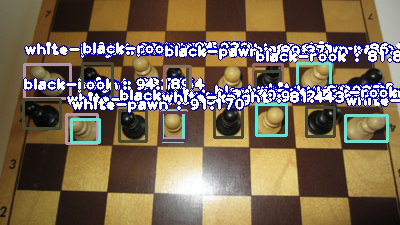

In [26]:
from PIL import Image
Image.open('detected.jpg')